In [1]:
# %load improved_find_data_start_row\(file_path\).py
from openpyxl import load_workbook
import pandas as pd

def improved_find_data_start_row(file_path):
    """
    Improved version to find the data start row in an Excel file.
    This version scans the first sheet to find the likely start of the data based on a heuristic that considers
    both the number of non-empty cells in a row and the consistency of data types in the row.
    """
    workbook = load_workbook(filename=file_path, read_only=True)
    sheet = workbook.worksheets[0]  # Assuming data is in the first sheet
    
    min_filled_cells = 2  # Minimum number of non-empty cells to consider a row as potential data start
    likely_data_start_row = 0
    consecutive_data_like_rows = 0
    
    for i, row in enumerate(sheet.iter_rows(values_only=True)):
        # Count non-empty cells and types of data in the row
        non_empty_cells = [cell for cell in row if cell is not None]
        filled_cells = len(non_empty_cells)
        data_types = {type(cell) for cell in non_empty_cells}
        
        # Check for a row with enough filled cells and more than one type of data (mixed types suggest data row)
        if filled_cells >= min_filled_cells and len(data_types) > 1:
            consecutive_data_like_rows += 1
        else:
            consecutive_data_like_rows = 0  # Reset if the row doesn't seem like a data row
        
        # If we find 2 consecutive rows that look like data, it's likely the start of the data
        if consecutive_data_like_rows >= 2:
            likely_data_start_row = i - 2  # Adjusting for 0-based index and to include the first data-like row
            break
    
    return likely_data_start_row

def improved_load_excel_with_autodetect(file_path):
    """
    Load an Excel file into a pandas DataFrame, attempting to auto-detect the start of the actual data using
    an improved mechanism.
    """
    start_row = improved_find_data_start_row(file_path)
    df = pd.read_excel(file_path, sheet_name=0, skiprows=start_row)
    return df

def load_all_sheets_with_data_start_detection(file_path):
    """
    Load all sheets from an Excel workbook, applying an improved mechanism to detect
    the start of actual data in each sheet.
    
    :param file_path: Path to the Excel workbook.
    :return: A dictionary of DataFrames, one for each sheet, with data start auto-detected.
    """
    # Load all sheets into a dictionary of DataFrames
    all_sheets = pd.read_excel(file_path, sheet_name=None, header=None)
    
    # Apply the improved data start detection mechanism to each sheet
    for sheet_name, df in all_sheets.items():
        # Find the likely data start row using the improved mechanism
        start_row = improved_find_data_start_row(file_path)
        # Reload the sheet with detected start row, if there is meaningful data to skip
        if start_row > 0:
            all_sheets[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=start_row)
    
    return all_sheets


In [254]:
statement_data=pd.read_excel(walmartPath+"walmartHistoricalFinancials.xlsx",skiprows=15)


def clean_cashflow_data(cashflow_data):
    # Replace a special character in the first column
    cashflow_data.iloc[:, 0] = cashflow_data.iloc[:, 0].str.replace('∟', '', regex=True)

    # Replace non-breaking space and 'n.a.' with NaN
    cashflow_data.replace('\xa0', '', regex=True, inplace=True)
    cashflow_data.replace('n.a.', np.nan, inplace=True)

    # Drop columns where all values are NaN
    cashflow_data = cashflow_data.dropna(how='all', axis=1)

    # Drop rows with less than 10 non-NaN values
    cashflow_data = cashflow_data.dropna(thresh=10)

    return cashflow_data


def update_column_names(cashflow_data, base_year):
    # Calculate the number of years by subtracting one to exclude the 'Cash Metric' column
    number_of_years = cashflow_data.shape[1] - 1
    
    # Create a list of years in reverse order starting from the base year
    years = [str(base_year - i) for i in range(number_of_years)]
    
    # Update DataFrame column names
    cashflow_data.columns = ['Cash Metric'] + years
    
    # Strip whitespace from the 'Cash Metric' column
    cashflow_data['Cash Metric'] = cashflow_data['Cash Metric'].str.strip()
    
    return cashflow_data



# Example usage:
# df = pd.DataFrame(...)  # your DataFrame with data
# updated_data = update_column_names(df, base_year=2022)
# print(updated_data)


statement_data = clean_cashflow_data(statement_data)
statement_data = update_column_names(statement_data,2021)
statement_data



,Cash Metric,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
1,Non-current assets,1.624290e+08,1.746890e+08,1.573980e+08,1.448580e+08,1.411360e+08,1.393420e+08,1.402120e+08,1.435660e+08,1.431650e+08,...,7.098400e+07,6.408600e+07,5.564900e+07,51575000.0,45993000.0,28864000.0,26032000.0,21611000.0,20210000.0,17481000.0
2,Intangible assets,2.898300e+07,3.107300e+07,3.118100e+07,1.824200e+07,1.703700e+07,1.669500e+07,1.810200e+07,1.951000e+07,2.049700e+07,...,9.882000e+06,9.389000e+06,8.566000e+06,9059000.0,9392000.0,2538000.0,0.0,0.0,0.0,0.0
3,Tangible fixed assets,1.098480e+08,1.270490e+08,1.113950e+08,1.148180e+08,1.141780e+08,1.165160e+08,1.166550e+08,1.179070e+08,1.166810e+08,...,5.902300e+07,5.137400e+07,4.575000e+07,40934000.0,35969000.0,25973000.0,23606000.0,20324000.0,18894000.0,15874000.0
4,Other non-current assets,2.359800e+07,1.656700e+07,1.482200e+07,1.179800e+07,9.921000e+06,6.131000e+06,5.455000e+06,6.149000e+06,5.987000e+06,...,2.079000e+06,3.323000e+06,1.333000e+06,1582000.0,632000.0,353000.0,2426000.0,1287000.0,1316000.0,1607000.0
5,Current assets,9.006700e+07,6.180600e+07,6.189700e+07,5.966400e+07,5.768900e+07,6.023900e+07,6.327800e+07,6.118500e+07,5.994000e+07,...,3.442100e+07,3.072200e+07,2.787800e+07,26555000.0,24356000.0,21132000.0,19352000.0,17993000.0,17331000.0,15338000.0
6,Stock,4.494900e+07,4.443500e+07,4.426900e+07,4.378300e+07,4.304600e+07,4.446900e+07,4.514100e+07,4.485800e+07,4.380300e+07,...,2.661200e+07,2.440100e+07,2.261400e+07,21442000.0,19793000.0,17076000.0,16497000.0,15897000.0,15989000.0,14064000.0
7,Debtors,6.516000e+06,6.284000e+06,6.283000e+06,5.614000e+06,5.835000e+06,5.624000e+06,6.778000e+06,6.677000e+06,6.768000e+06,...,1.254000e+06,1.569000e+06,2.000000e+06,1768000.0,1341000.0,1118000.0,976000.0,845000.0,853000.0,700000.0
8,Other current assets,3.860200e+07,1.108700e+07,1.134500e+07,1.026700e+07,8.808000e+06,1.014600e+07,1.135900e+07,9.650000e+06,9.369000e+06,...,6.555000e+06,4.752000e+06,3.264000e+06,3345000.0,3222000.0,2938000.0,1879000.0,1251000.0,489000.0,574000.0
9,Of which cash and cash equivalent,1.774100e+07,9.465000e+06,7.722000e+06,6.456000e+06,6.602000e+06,8.343000e+06,9.135000e+06,6.627000e+06,7.066000e+06,...,5.199000e+06,2.736000e+06,2.161000e+06,2054000.0,1856000.0,1879000.0,1447000.0,883000.0,83000.0,45000.0
10,Total assets,2.524960e+08,2.364950e+08,2.192950e+08,2.045220e+08,1.988250e+08,1.995810e+08,2.034900e+08,2.047510e+08,2.031050e+08,...,1.054050e+08,9.480800e+07,8.352700e+07,78130000.0,70349000.0,49996000.0,45384000.0,39604000.0,37541000.0,32819000.0


In [229]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Import data into pandas DataFrame
# Assuming financial_data and store_counts are already loaded into pandas DataFrames
walmartPath="/Users/myself/Desktop/Walmart USA Serching for Growth/"



cashflow_data=pd.read_excel(walmartPath+"walmartCashFlow.xlsx",skiprows=15)

store_count=pd.read_excel(walmartPath+"walmartCashFlow.xlsx", "Yearly Store Count by Type",skiprows=2)


# cashflow_data,store_count
distribution_count=pd.read_excel(walmartPath+"walmartCashFlow.xlsx", "Yearly DC", skiprows=1)

cashflow_data.iloc[:,0]=cashflow_data.iloc[:,0].str.replace('∟', '', regex=True)

cashflow_data.replace('\xa0', '', regex=True, inplace=True)
cashflow_data.replace('n.a.', np.nan, inplace=True)

cashflow_data=cashflow_data.dropna(how='all',axis=1)
cashflow_data=cashflow_data.dropna(thresh=10)
cashflow_data


# Correctly identify and assign unique years to each financial data column
# Assuming the first column after 'Financial Metric' is the most recent year and decrement for each column after
number_of_years = cashflow_data.shape[1] - 1  # Total columns minus the 'Financial Metric' column
base_year = 2022
years = [str(base_year - i) for i in range(number_of_years)]

# # Map the new year labels to the columns
cashflow_data.columns = ['Cash Metric'] + years
cashflow_data['Cash Metric']=cashflow_data['Cash Metric'].str.strip()

# # if cashflow_data.index.name != 'Cash Metric':
# #     cashflow_datacopy=cashflow_data.copy
# #     cashflow_data.set_index('Cash Metric', inplace=True)  # Setting 'Cash Metric' as index

cashflow_datacopy=cashflow_data.copy()
cashflow_data.columns
# # cashflow_dict={}
# # cashflow_dict['cashflow_data']=cashflow_data
# # cashflow_dict['store_count']=store_data
# # cashflow_dict

# def pivot_year_columns_to_rows(df,column_names):
#     df_pivot = df.pivot_table(values=df.columns[1:],columns=df[column_names])
#     if column_names == "Year":
#         df_pivot.columns.name="Columns"
#         df_pivot.index.name="Year"
#     else:
#         df_pivot.index.name="Year"
#     return df_pivot

# cashflow_pivot=pivot_year_columns_to_rows(cashflow_data,'Cash Metric')  #cashflow_data.pivot_table(values=cashflow_data.columns,columns=cashflow_data['Cash Metric'])
# store_pivot=pivot_year_columns_to_rows(store_count,'Year')

# cashflow_data.columns[1:],cashflow_pivot.index
# cashflow_pivot,store_pivot

# distribution_count

Index(['Cash Metric', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007',
       '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998',
       '1997', '1996', '1995'],
      dtype='object')

In [271]:
def pivot_year_columns_to_rows(df,column_names):
    df_pivot = df.pivot_table(values=df.columns[1:],columns=df[column_names])
    if column_names == "Year":
        df_pivot.columns.name="Columns"
        df_pivot.index.name="Year"
    else:
        df_pivot.index.name="Year"
    return df_pivot

cashflow_pivot=pivot_year_columns_to_rows(cashflow_data,'Cash Metric')  #cashflow_data.pivot_table(values=cashflow_data.columns,columns=cashflow_data['Cash Metric'])
statement_pivot=pivot_year_columns_to_rows(statement_data,'Cash Metric')

store_pivot=pivot_year_columns_to_rows(store_count,'Year')
store_pivot.rename(columns={"Total":"Total Store"},inplace=True)

# Prepare distribution centre table for merge
distribution_count.rename(columns={"Total":"Total DC","Total.1":"Total SqFt"},inplace=True)
dist_pivot=distribution_count.pivot_table(index='Year')
dist_pivot.index=dist_pivot.index.astype(str)



#create year to year difference tables and shift periods
store_diff = store_pivot.diff(axis=0)
store_diff = store_diff.shift(periods=-1)
store_diff.dropna(how='all', axis=0 , inplace=True)

dist_pivot = dist_pivot.shift(periods=0)


# dist_diff = dist_pivot.diff(axis=0)



# dist_diff = dist_diff.shift(periods=0)
# dist_diff.dropna(how='all', axis=0 , inplace=True)

# dist_av=pd.DataFrame()
# for i in [0,1,2]:
#     dist_temp = dist_diff.shift(periods=-i)
#     dist_av[i] = dist_temp['Total SqFt']


# dist_av.dropna(how='any', axis=0, inplace=True)
# dist_diff['Total SqFt Rolling'] = dist_av.mean(axis=1)
# dist_diff[['Total SqFt','Total SqFt Rolling']]

In [279]:
merge_data_inner = pd.merge(cashflow_pivot, store_diff, on='Year')
merge_data_inner = pd.merge(merge_data_inner, dist_diff, on='Year')



merge_data_left = pd.merge(cashflow_pivot, store_diff, on='Year', how='left')
merge_data_left = pd.merge(merge_data_left, dist_pivot ,on='Year',how='left')

sqft = merge_data_left[['Capital Expenditures','Total SqFt']]
#sqft.interpolate(inplace=True)

sqft.corr()
merge_left_corr = merge_data_left.corr()
#merge_left_corr[['Capital Expenditures']].loc['Total Store'], merge_left_corr[['Capital Expenditures']].loc['Net Income'], merge_left_corr[['Capital Expenditures']].loc['Total SqFt Rolling']


fin_merge = pd.merge(statement_pivot, dist_pivot, on='Year')
fin_merge_corr = fin_merge.corr()
fin_merge_corr[['Total SqFt']].loc['Tangible fixed assets'], sqft.corr()

(Total SqFt    0.962573
 Name: Tangible fixed assets, dtype: float64,
 Capital Expenditures    0.187206
 Name: Inventories, dtype: float64,
                       Capital Expenditures  Total SqFt
 Capital Expenditures              1.000000   -0.826731
 Total SqFt                       -0.826731    1.000000)

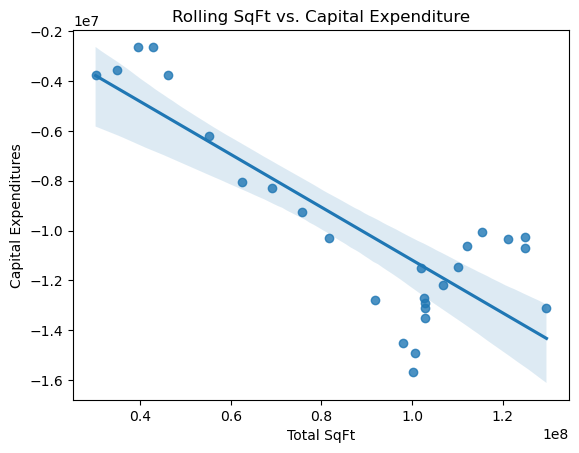

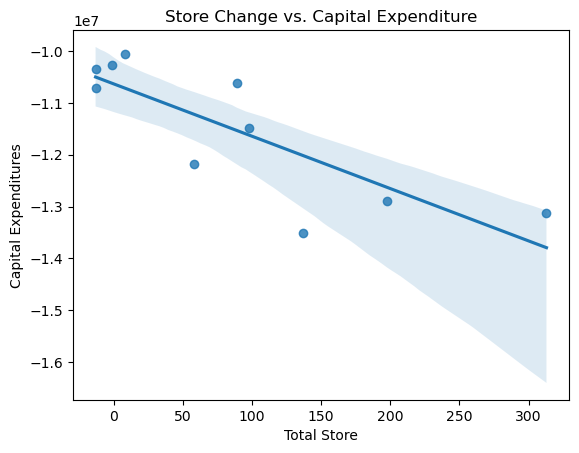

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the relationship between Capex and Rolling SqFt
sns.regplot(x='Total SqFt', y='Capital Expenditures', data=merge_data_left)
plt.title('Rolling SqFt vs. Capital Expenditure')
plt.show()

sns.regplot(x='Total Store', y='Capital Expenditures', data=merge_data_left)
plt.title('Store Change vs. Capital Expenditure')
plt.show()



In [228]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame
# Convert all columns to numeric, setting errors='coerce' will convert non-convertible types to NaN


merge_inner_numeric = merge_data_inner.apply(pd.to_numeric, errors='coerce')
# Check your data

merge_inner_numeric.columns

Index(['Accounts Payable', 'Accounts Receivable', 'Accrued Expenses',
       'Acquisition of Business', 'Capital Expenditures',
       'Cash Dividends Paid - Common', 'Cash Interest Paid, Supplemental',
       'Cash Taxes Paid, Supplemental', 'Changes in Working Capital',
       'Common Stock, Net', 'Deferred Taxes', 'Depreciation',
       'Depreciation, Supplemental', 'Depreciation/Depletion',
       'Discontinued Operations', 'Financing Cash Flow Items',
       'Foreign Exchange Effects', 'Inventories',
       'Issuance (Retirement) of Debt, Net',
       'Issuance (Retirement) of Stock, Net', 'Long Term Debt Issued',
       'Long Term Debt Reduction', 'Long Term Debt, Net',
       'Net Cash - Beginning Balance', 'Net Cash - Ending Balance',
       'Net Change in Cash', 'Net Income', 'Other Financing Cash Flow',
       'Other Investing Cash Flow', 'Other Investing Cash Flow Items, Total',
       'Other Non-Cash Items', 'Purchase of Fixed Assets',
       'Repurchase/Retirement of Commo

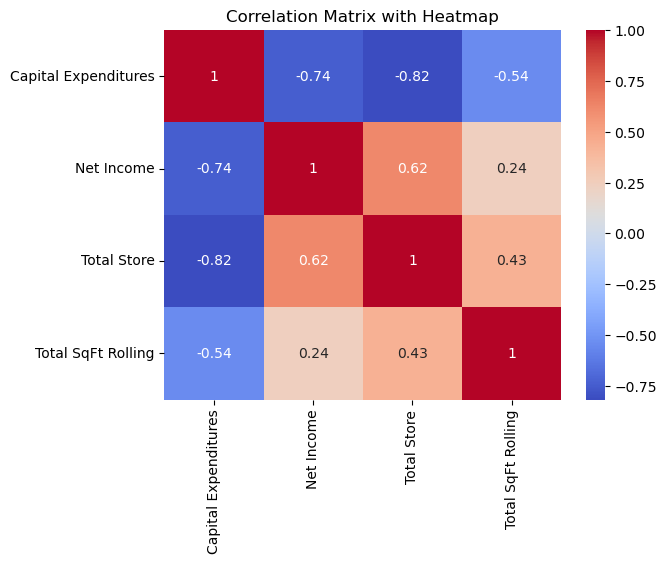

                feature        VIF
0  Capital Expenditures  86.165352
1            Net Income  51.045924
2           Total Store   2.309888
3    Total SqFt Rolling  24.290959


Year
2012    3.060155e+06
2013    2.810680e+06
2014    3.665831e+06
2015    4.291586e+06
2016    3.193207e+06
2017    2.831584e+06
2018    1.825163e+06
2019    3.486407e+06
2020    2.014801e+06
2021    2.071468e+06
Name: Total SqFt Rolling, dtype: float64

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def analyze_correlations(variateDFT):
    # Creating a correlation matrix and displaying it as a heatmap
    corr_matrix = variateDFT.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix with Heatmap')
    plt.show()

    # Checking for multicollinearity using Variance Inflation Factor (VIF)
    vif_data = pd.DataFrame()
    vif_data["feature"] = variateDFT.columns
    vif_data["VIF"] = [variance_inflation_factor(variateDFT.values, i) for i in range(len(variateDFT.columns))]
    print(vif_data)

merge_inner_select = merge_inner_numeric[['Capital Expenditures', 'Net Income', 'Total Store', 'Total SqFt']]
analyze_correlations(merge_inner_select)   
merge_inner_select['Total SqFt Rolling']


In [ ]:
import pandas as pd
import statsmodels.api as sm

df=variateDFT
# Assuming 'df' contains your data with columns 'Year', 'Net_Income', and 'Capex'
X = sm.add_constant(df['Net Income'])  # Adds a constant term to the predictor
y = df['Capital Expenditures']

model = sm.OLS(y, X).fit()
df['Capex_Residual'] = model.resid  # Calculate and store residuals

# Review model summary to validate the linear relationship
print(model.summary())


In [129]:
def analyze_capex_store_relationship(financial_data, store_counts):
    # Extracting CapEx data and the relevant years
    capex_data = financial_data[financial_data['Cash Metric'].isin(['Purchase of Fixed Assets', 'Capital Expenditures'])]
    print(f"Before transposition: {capex_data.shape}")  # Check the shape before transposition
    print(capex_data)  # View the content
    
    capex_data = capex_data.drop('Cash Metric', axis=1).transpose()  # Transpose to make the years as rows
    print(f"After transposition: {capex_data.shape}")  # Check the shape after transposition
    print(capex_data)  # View the content
    
    # Ensure that we have exactly two rows for 'Purchase of Fixed Assets' and 'Capital Expenditures'
    if capex_data.shape[0] == 2:
        capex_data.columns = ['Purchase of Fixed Assets', 'Capital Expenditures']
    else:
        raise ValueError("The CapEx data does not have the expected number of rows after transposition.")
    
    # ... rest of the original function ...
    
    return capex_data  # Temporarily return this to check the output

# Call the function with the data
capex_data_checked = analyze_capex_store_relationship(cashflow_data, store_count)


Before transposition: (2, 29)
                 Cash Metric        2022        2021        2020        2019  \
32  Purchase of Fixed Assets -13106000.0 -10264000.0 -10705000.0 -10344000.0   
35      Capital Expenditures -13106000.0 -10264000.0 -10705000.0 -10344000.0   

          2018        2017        2016        2015        2014  ...  \
32 -10051000.0 -10619000.0 -11477000.0 -12174000.0 -13115000.0  ...   
35 -10051000.0 -10619000.0 -11477000.0 -12174000.0 -13115000.0  ...   

          2004       2003       2002       2001       2000       1999  \
32 -10308000.0 -9245000.0 -8285000.0 -8042000.0 -6183000.0 -3734000.0   
35 -10308000.0 -9245000.0 -8285000.0 -8042000.0 -6183000.0 -3734000.0   

         1998       1997       1996       1995  
32 -2636000.0 -2643000.0 -3566000.0 -3734000.0  
35 -2636000.0 -2643000.0 -3566000.0 -3734000.0  

[2 rows x 29 columns]
After transposition: (28, 2)
              32          35
2022 -13106000.0 -13106000.0
2021 -10264000.0 -10264000.0
2020 -107

ValueError: The CapEx data does not have the expected number of rows after transposition.

In [ ]:
import pandas as pd


def preprocess_store_counts(store_counts):
    # Ensure all data is numeric, converting non-numeric to NaN
    store_counts = store_counts.apply(pd.to_numeric, errors='coerce')

    # Calculate net change in stores per year for each type of store
    store_counts_diff = store_counts.diff(axis=1)  # Calculate year-over-year difference
    store_counts_diff = store_counts_diff.iloc[:, 1:]  # Exclude the first column as it will be NaN after diff
    
    return store_counts_diff

# Re-run the preprocessing with corrected data types
# store_counts_diff = preprocess_store_counts(store_count)

# Optionally, you can check if there are many NaNs, which might indicate many non-numeric entries
# print(store_counts_diff.isna().sum())

def correlate_capex_changes(store_counts_diff, financial_data):
    # Focus on Capital Expenditures for simplicity
    capex_data = financial_data.loc[financial_data['Cash Metric'].isin(['Capital Expenditures'])]
    capex_data = capex_data.drop('Cash Metric', axis=1).transpose()
    capex_data.columns = ['Capital Expenditures']  # Set proper column name after transpose

    # Ensure data types are correct for analysis
    capex_data = capex_data.astype(float)  # Convert CapEx data to float for calculations
    store_counts_diff = store_counts_diff.astype(float)  # Also ensure store count diffs are float

    # Align the indices of both DataFrames to ensure they match for correlation analysis
    # Both should have years as indices and be aligned accordingly
    if not capex_data.index.equals(store_counts_diff.columns):
        # Assuming both indices are years and formatted similarly
        # This step might need adjustment based on actual index formats
        capex_data = capex_data.reindex(store_counts_diff.columns)
        print(store_counts_diff)
        store_counts_diff=store_counts_diff.T
        store_counts_diff=store_counts_diff.shift(periods=-1)
        store_counts_diff=store_counts_diff.T
        print(store_counts_diff)
    # Compute correlation matrix
    correlation_matrix = pd.concat([capex_data.iloc[::-1], store_counts_diff.loc[3]], axis=1).corr()
    print(capex_data)
    return correlation_matrix

# Assuming 'cashflow_data' and 'store_count' are your DataFrames loaded correctly
store_counts_diff = preprocess_store_counts(store_count)

correlation_results = correlate_capex_changes(store_counts_diff, cashflow_data)

# Output results
print(correlation_results)
store_count_total=store_count.loc[3]

In [ ]:

# def correlate_capex_changes(store_counts_diff, financial_data):
#     # Focus on Capital Expenditures for simplicity
capex_data = cashflow_data.loc[cashflow_data['Cash Metric'].isin(['Capital Expenditures'])]
capex_data = capex_data.drop('Cash Metric', axis=1).transpose()
capex_data.columns = ['Capital Expenditures']  # Set proper column name after transpose
capex_data.index
print(capex_data)
dist_counts_diff = preprocess_store_counts(totaldist_count.T)
dist_counts_diffT=dist_counts_diff.T
dist_counts_diffT=dist_counts_diffT.shift(periods=-5)
dist_counts_diffT.index=dist_counts_diffT.index.astype('string')
print(dist_counts_diffT)


dist_counts_diffT = dist_counts_diffT.loc[dist_counts_diffT.index.isin(capex_data.index)]
#dist_counts_diffT
correlation_matrix = pd.concat([capex_data, dist_counts_diffT], axis=1).corr()
correlation_matrix


    # # Ensure data types are correct for analysis
    # capex_data = capex_data.astype(float)  # Convert CapEx data to float for calculations
    # store_counts_diff = store_counts_diff.astype(float)  # Also ensure store count diffs are float

    # # Align the indices of both DataFrames to ensure they match for correlation analysis
    # # Both should have years as indices and be aligned accordingly
    # if not capex_data.index.equals(store_counts_diff.columns):
    #     # Assuming both indices are years and formatted similarly
    #     # This step might need adjustment based on actual index formats
    #     #capex_data = capex_data.reindex(store_counts_diff.columns)
    #     store_counts_diff=store_counts_diff.loc[store_counts['Cash Metric'].isin(['Capital Expenditures'])]
    #     store_counts_diff=store_counts_diff.reindex(capex_data.index)
    #     store_counts_diff=store_counts_diff.T
    #     #print(store_counts_diff)
    # # Compute correlation matrix
    # correlation_matrix = pd.concat([capex_data, store_counts_diff], axis=1).corr()
    # return correlation_matrix

# Assuming 'cashflow_data' and 'store_count' are your DataFrames loaded correctly

# correlation_results = correlate_capex_changes(dist_counts_diff, cashflow_data)

# Output results
#print(correlation_results)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def expanded_correlation_analysis(financial_data, metrics_list):
    # Filter for relevant metrics
    relevant_data = financial_data[metrics_list]
    # Calculate correlations
    correlation_matrix = relevant_data.corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix for Financial Metrics')
    plt.show()

    return correlation_matrix

# Define the list of metrics to include in the analysis
metrics_to_analyze = [
    'Capital Expenditures',
    'Net Income',
    'Total Cash from Operating Activities',
    'Depreciation',
    'Changes in Working Capital',
    'Total Cash from Financing Activities'
]

if cashflow_data.index.name != 'Cash Metric':
    cashflow_datacopy=cashflow_data.copy
    cashflow_data.set_index('Cash Metric', inplace=True)  # Setting 'Cash Metric' as index

cashflow_dataT=cashflow_data.T
cashflow_dataT.columns
# cashflow_dataT['Net Income']

# Assuming 'cashflow_data' is your DataFrame containing all financial metrics
correlation_results = expanded_correlation_analysis(cashflow_dataT, metrics_to_analyze)
print(correlation_results)



In [ ]:

def analyze_capex_store_relationship(financial_data, store_counts):
    # Analyze the relationship between CapEx and store counts
    # ...

def model_capex_for_new_stores(financial_data, store_counts):
    # Model CapEx for new stores using regression analysis or curve fitting
    # ...

def monte_carlo_simulation(model):
    # Perform Monte Carlo simulation using the CapEx model
    # ...

def integrate_with_expansion_model(expansion_model, capex_model):
    # Update NeighborhoodMarketExpansionModel with new CapEx estimates
    # ...

# Now let's run these functions in sequence

preprocessed_financial_data = preprocess_data(financial_data, store_counts)
capex_store_relationship = analyze_capex_store_relationship(preprocessed_financial_data, store_counts)
capex_model = model_capex_for_new_stores(preprocessed_financial_data, store_counts)
simulation_results = monte_carlo_simulation(capex_model)
integrate_with_expansion_model(neighborhood_market_expansion_model, capex_model)


## Distribution Center Correlation

In [ ]:
import pandas as pd

# Assuming 'distribution_center_data' is loaded into a DataFrame with a 'Total' column already calculated
def preprocess_distribution_totals(distribution_center_data):
    # Calculate year-over-year changes for the total count of distribution centers
    distribution_diff = distribution_center_data['Total'].diff().dropna()  # Calculate and drop the first NaN result
    return distribution_diff

def correlate_distribution_totals_capex(distribution_diff, capex_data):
    # Ensure capex_data is aligned and formatted correctly, focusing on 'Capital Expenditures'
    capex_data = capex_data.loc[capex_data['Cash Metric'] == 'Capital Expenditures'].drop('Cash Metric', axis=1)
    capex_data = capex_data.transpose()
    capex_data.columns = ['CapEx']
    
    # Ensure the years align between both datasets
    common_years = distribution_diff.index.intersection(capex_data.index)
    distribution_aligned = distribution_diff.loc[common_years]
    capex_aligned = capex_data.loc[common_years]
    
    # Compute correlation
    correlation_result = distribution_aligned.corr(capex_aligned['CapEx'])
    return correlation_result

# Load your distribution center data and cash flow data correctly before calling these functions
distribution_diff = preprocess_distribution_totals(distribution_center_data)
correlation_result = correlate_distribution_totals_capex(distribution_diff, cashflow_data)

# Print or visualize the result
print("Correlation between total distribution center changes and CapEx:", correlation_result)


## Some Visual Trash

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats
# from sklearn.linear_model import LinearRegression

# # Analyzing the relationship between CapEx and store counts
# def analyze_capex_store_relationship(financial_data, store_counts):
#     # Here you can calculate correlations and perform regression analysis
#     # This is a placeholder for the real implementation
#     correlation = financial_data.corrwith(store_counts)
#     print("Correlation between CapEx and store counts:", correlation)
    
#     # For visualization, you could plot CapEx vs store counts
#     plt.scatter(store_counts, financial_data['Capital Expenditures'])
#     plt.xlabel('Store Counts')
#     plt.ylabel('Capital Expenditures')
#     plt.show()

# # Modeling CapEx for new stores using regression analysis
# def model_capex_for_new_stores(financial_data, store_counts):
#     # Prepare the data
#     X = store_counts.values.reshape(-1, 1)  # Features
#     y = financial_data['Capital Expenditures'].values      # Target variable
    
#     # Fit the linear regression model
#     model = LinearRegression()
#     model.fit(X, y)
    
#     return model

# # Performing Monte Carlo simulation using the CapEx model
# def monte_carlo_simulation(model, n_simulations=1000):
#     # Placeholder for real implementation
#     # Simulate different scenarios to project future CapEx
#     simulations = []
#     for _ in range(n_simulations):
#         simulated_store_count = np.random.normal(loc=store_count_mean, scale=store_count_std)
#         projected_capex = model.predict([[simulated_store_count]])
#         simulations.append(projected_capex)
    
#     return np.mean(simulations), np.std(simulations)

# # Assuming financial_data and store_counts DataFrames are already preprocessed and loaded
# capex_model = model_capex_for_new_stores(cashflow_data, store_count)
# mean_projection, std_deviation = monte_carlo_simulation(capex_model)
# print(f"Projected CapEx Mean: {mean_projection}, Standard Deviation: {std_deviation}")
